In [4]:
import os
import seaborn as sns
import pandas as pd

dest = "processed_data"

# x1 = lat, x2 = long, y = biome
lat_long_df = pd.DataFrame(columns=["lat", "long", "biome"]) 
for root, dirs, files in os.walk(dest):
    for filename in files:
        split = filename.split('_')
        if len(split) >= 2:
            lat = float(split[0])
            long = float(split[1][:-4])
            biome = root[root.find('\\')+1:len(root)]
            row = {'lat': lat, 'long': long, 'biome': biome}
            lat_long_df = lat_long_df.append(row, ignore_index = True)
        else:
            print("Failed to parse filename:", filename)

lat_long_df

,lat,long,biome
0,-15.068,-70.601,desert
1,-18.653,126.334,desert
2,-19.673,-67.609,desert
3,-20.249,132.917,desert
4,-21.148,129.939,desert
...,...,...,...
1111,81.244,-68.157,tundra
1112,81.251,-67.386,tundra
1113,81.301,-67.865,tundra
1114,81.330,-67.447,tundra


<AxesSubplot:xlabel='long', ylabel='lat'>

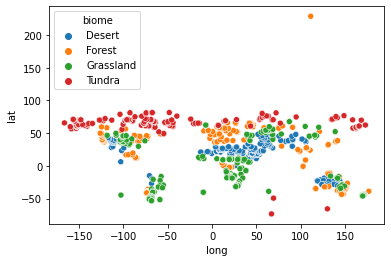

In [62]:
sns.scatterplot(data=lat_long_df,x = "long", y="lat", hue = "biome")

In [5]:
#for SVM
from sklearn.model_selection import train_test_split

X = lat_long_df.drop("biome",axis=1)
y = lat_long_df["biome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

clf = SVC(kernel="rbf", decision_function_shape="ovo", C=0.2 ,gamma=80)
model = clf.fit(scaler.transform(X_train), np.asarray(y_train))

print(classification_report(y_test, clf.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

      desert       1.00      1.00      1.00        27
      forest       0.83      0.94      0.88        32
   grassland       0.92      0.92      0.92        24
      tundra       1.00      0.86      0.93        29

    accuracy                           0.93       112
   macro avg       0.94      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(decision_function_shape='ovo',kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

[0 0 0 ... 3 3 3]


NameError: name 'iris' is not defined

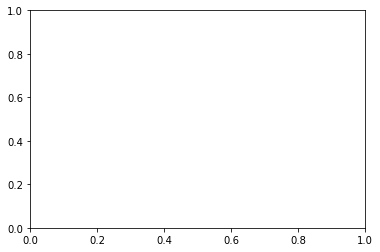

In [11]:
#This cell constructs a seperate model with unscaled data for graphing purposes

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report


# Take the first two features. We could avoid this by using a two-dim dataset
pX = np.asarray(lat_long_df.drop("biome",axis=1))
py = np.asarray(lat_long_df.biome.astype('category').cat.codes)
print(py)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
plot_model = svm.SVC(kernel="rbf", gamma="auto", C=C).fit(pX,y)

# title for the plots
titles = "SVC with RBF kernel"


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#X0, X1 = X[:, 0], X[:, 1]
clf = plot_model
title = titles
ax = sub
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
#ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()